In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import statistics as stats
import re

from sklearn import preprocessing

In [2]:
#Dataset PIB

df_1 = pd.read_csv('PIB-municipios.csv')
df_1.head()

,Nome do Município,PIB Agropecuária x1000,PIB Industria x1000,"PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000","PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000"
0,Belo Vale,17362.02,63196.87,51778.48,49606.95
1,Betim,12976.86,11537467.51,9924628.62,2212076.62
2,Bonfim,14592.30,9781.09,41413.59,30739.05
3,Brumadinho,22007.82,1041129.44,982042.22,255485.76
4,Cachoeira da Prata,1294.14,2271.62,18942.03,19153.61


In [3]:
#Dataset CAR

df_2 = pd.read_csv('CAR-recursos-naturais-municipios.csv')
df_2.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,446,2,741,9,1,3,0,436,0,247,586,0,57,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [4]:
#Dataset IDHM
#https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html

df_3 = pd.read_csv('IDH-cidades.csv')
df_3.head()

,Nome do Município,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,Belo Vale,0.655,0.672,0.814,0.514
1,Betim,0.749,0.709,0.864,0.687
2,Bonfim,0.637,0.669,0.834,0.464
3,Brumadinho,0.747,0.761,0.857,0.639
4,Cachoeira da Prata,0.741,0.689,0.834,0.707


In [5]:
#dataset IBGE

df_4 = pd.read_csv('IBGE-municipios.csv')
df_4.head()

,Nome do Município,População estimada(2021),População censo(2010),Densidade demografica(2010),Salario medio mensal(2019),Pessoal ocupado(2019),Populacao ocupada(2019),Percentual da populacao com renda de ate meio salario(2010),Taxa escolarizacao 6 a 14 anos(2010),IDEB anos finais ensino fundamental(2019),...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,Belo Vale,7723,7536,20.59,1.8,1247,16.2,38.5,97.1,6.3,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,Betim,450024,378089,1102.80,3.2,118718,27.0,33.7,98.0,6.1,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,Bonfim,6852,6818,22.59,1.6,770,11.2,36.8,98.5,5.6,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,Brumadinho,41208,33973,53.13,2.2,12330,30.7,33.5,98.4,6.7,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,Cachoeira da Prata,3580,3654,59.53,1.6,632,17.5,31.2,98.1,6.2,...,15260.12,12455.95,25.00,NaN,2,61.381,92.6,28.6,7.2,Cerrado


In [6]:
#União dos datasets - merge com pandas

df = pd.merge(df_1, df_2, how='inner', on="Nome do Município")
df = pd.merge(df, df_3, how='inner', on="Nome do Município")
df = pd.merge(df_2, df_3, how='inner', on="Nome do Município")
df = pd.merge(df, df_4, how='inner', on="Nome do Município")
df.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,Betim,2664,0,446,2,741,9,1,3,0,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,Casa Grande,3617,0,696,14,585,11,0,25,5,...,13260.00,11620.03,NaN,1.7,1,157.727,63.8,48.0,8.2,Mata Atlântica


In [7]:
#Tratamento dos dados numéricos do PIB do municipio

agropecuaria = df_1['PIB Agropecuária x1000']
industria = df_1['PIB Industria x1000']
servicos = df_1['PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000']
servicos_2 = df_1['PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000']

agropecuaria_f = []
industria_f = []
servicos_f = []
servicos_f_2 = []

for i in agropecuaria:
    agropecuaria_f.append(i)

for i in industria:
    industria_f.append(i)
    
for i in servicos:
    servicos_f.append(i)
    
for i in servicos_2:
    servicos_f_2.append(i)

In [8]:
#Tratamento dos dados numéricos do IDH dos Municipios

idh = df_3['IDH 2010']
idh_renda = df_3['IDHM Renda 2010']
idh_longevidade = df_3['IDHM Longevidade 2010']
idh_educacao = df_3['IDHM Educação 2010']

idh_f = []
idh_renda_f = []
idh_longevidade_f = []
idh_educacao_f = []

for i in idh:
    idh_f.append(float(i))

for i in idh_renda:
    idh_renda_f.append(float(i))

for i in idh_longevidade:
    idh_longevidade_f.append(float(i))
    
for i in idh_educacao:
    idh_educacao_f.append(float(i))


In [9]:
#Tratamento dos dados númericos do CAR

app = df_2['APP']
superior_1800 = df_2['Altitude Superior 1800']
consolidade = df_2['Consolidada']
declividade_maior_45 = df_2['Declividade Maior 45']
imoveis = df_2['Imoveis']
pousio = df_2['Pousio']
topo_morro = df_2['Topo de Morro']
banhado = df_2['Banhado']
borda_chapada = df_2['Borda Chapada']
hidrografia = df_2['Hidrografia']
manguezal = df_2['Manguezal']
nascentes = df_2['Nascentes']
reserva_legal = df_2['Reserva Legal']
restinga = df_2['Restinga']
servidao_administrativa = df_2['Servidão Administrativa']
restrito = df_2['Restrito']
vegetacao_nativa = df_2['Vegetação Nativa']
vereda = df_2['Vereda']
                           
app_f = []
superior_1800_f = []
consolidade_f = []
declividade_maior_45_f = []
imoveis_f = []
pousio_f = []
topo_morro_f = []
banhado_f = []
borda_chapada_f = []
hidrografia_f = []
manguezal_f = []
nascentes_f = []
reserva_legal_f = []
restinga_f = []
servidao_administrativa_f = []
restrito_f = []
vegetacao_nativa_f = []
vereda_f = []
                           
for i in app:
    app_f.append(float(i))

for i in superior_1800:
    superior_1800_f.append(float(i))
                           
for i in consolidade:
    consolidade_f.append(float(i))
                           
for i in declividade_maior_45:
    declividade_maior_45_f.append(float(i))
                           
for i in imoveis:
    imoveis_f.append(float(i))
                           
for i in pousio:
    pousio_f.append(float(i))
                           
for i in topo_morro:
    topo_morro_f.append(float(i))
                           
for i in banhado:
    banhado_f.append(float(i))
                           
for i in borda_chapada:
    borda_chapada_f.append(float(i))
                           
for i in hidrografia:
    hidrografia_f.append(float(i))
                           
for i in manguezal:
    manguezal_f.append(float(i))
                           
for i in nascentes:
    nascentes_f.append(float(i))
                           
for i in reserva_legal:
    reserva_legal_f.append(float(i))
                           
for i in restinga:
    restinga_f.append(float(i))
                           
for i in servidao_administrativa:
    servidao_administrativa_f.append(float(i))
                           
for i in restrito:
    restrito_f.append(float(i))
                           
for i in vegetacao_nativa:
    vegetacao_nativa_f.append(float(i))
                           
for i in vereda:
    vereda_f.append(float(i))
    

In [10]:
#Tratamento dos dados IBGE

populacao_estimada = df_4['População estimada(2021)']
populacao_censo = df_4['População censo(2010)']
densidade_demografica = df_4['Densidade demografica(2010)']
salario_medio = df_4['Salario medio mensal(2019)']
pessoal_ocupado = df_4['Pessoal ocupado(2019)']
populacao_ocupada = df_4['Populacao ocupada(2019)']
percentual_renda_meio_salario = df_4['Percentual da populacao com renda de ate meio salario(2010)']
taxa_escolarizacao = df_4['Taxa escolarizacao 6 a 14 anos(2010)']
IDEB_ensino_fundamental = df_4['IDEB anos finais ensino fundamental(2019)']
IDEB_ensino_medio = df_4['IDEB anos finais ensino fundamental(2019)']
docentes_ensino_fundamental = df_4['Docentes ensino fundamental(2020)']
docentes_ensino_medio = df_4['Docentes ensino medio(2020)']
numero_escolas_ensino_fundamental = df_4['Numeros estabelecimentos ensino fundamental(2010)']
numero_escolas_ensino_medio = df_4['Numeros estabelecimentos ensino medio(2020)']
pib = df_4['PIB per capita(2019)']
receitas_externas = df_4['Percentual receitas fontes externas(2015)']
IDHM = df_4['IDHM(2010)']
total_receitas_realizadas = df_4['Total receitas realizadas(2017)']
total_receitas_empenhadas = df_4['Total receitas empenhadas(2017)']
mortalidade_infantil = df_4['Mortalidade infantil(2019)']
internacoes_diarreias = df_4['Internacoes por diarreia(2016)']
SUS = df_4['Estabelecimentos SUS(2009)']
area = df_4['Area territorial(2021)']
esgotamento = df_4['Esgotamento adequado(2010)']
arborizacao = df_4['Arborização vias publicas(2010)']
urbanizacao = df_4['Urbanizacao vias publicas(2010)']
bioma = df_4['Bioma']

populacao_estimada_f = []
populacao_censo_f = []
densidade_demografica_f = []
salario_medio_f = []
pessoal_ocupado_f = []
populacao_ocupada_f = []
percentual_renda_meio_salario_f = []
taxa_escolarizacao_f = []
IDEB_ensino_fundamental_f = []
IDEB_ensino_medio_f = []
docentes_ensino_fundamental_f = []
docentes_ensino_medio_f = []
numero_escolas_ensino_fundamental_f = []
numero_escolas_ensino_medio_f = []
pib_f = []
receitas_externas_f = []
IDHM_f = []
total_receitas_realizadas_f = []
total_receitas_empenhadas_f = [] 
mortalidade_infantil_f = [] 
internacoes_diarreias_f = []
SUS_f = []
area_f = []
esgotamento_f = []
arborizacao_f = []
urbanizacao_f = []
bioma_f = [] 

for i in populacao_estimada:
    populacao_estimada_f.append(float(i))
    
for i in populacao_censo:
    populacao_censo_f.append(float(i))
    
for i in densidade_demografica:
    densidade_demografica_f.append(float(i))
    
for i in salario_medio:
    salario_medio_f.append(float(i))
    
for i in pessoal_ocupado:
    pessoal_ocupado_f.append(float(i))
    
for i in populacao_ocupada:
    populacao_ocupada_f.append(float(i))
    
for i in percentual_renda_meio_salario:
    percentual_renda_meio_salario_f.append(float(i))

for i in taxa_escolarizacao:
    taxa_escolarizacao_f.append(float(i))

for i in IDEB_ensino_fundamental:
    IDEB_ensino_fundamental_f.append(float(i))

for i in IDEB_ensino_medio:
    IDEB_ensino_medio_f.append(float(i))
    
for i in docentes_ensino_fundamental:
    docentes_ensino_fundamental_f.append(float(i))
    
for i in docentes_ensino_medio:
    docentes_ensino_medio_f.append(float(i))
    
for i in numero_escolas_ensino_fundamental:
    numero_escolas_ensino_fundamental_f.append(float(i))
    
for i in numero_escolas_ensino_medio:
    numero_escolas_ensino_medio_f.append(float(i))
    
for i in pib:
    pib_f.append(float(i))
    
for i in receitas_externas:
    receitas_externas_f.append(float(i))
    
for i in IDHM:
    IDHM_f.append(float(i))
    
for i in total_receitas_realizadas:
    total_receitas_realizadas_f .append(float(i))

for i in total_receitas_empenhadas:
    total_receitas_empenhadas_f.append(float(i))
    
for i in mortalidade_infantil:
    mortalidade_infantil_f.append(float(i))
    
for i in internacoes_diarreias:
    internacoes_diarreias_f.append(float(i))
    
for i in SUS:
    SUS_f.append(float(i))
    
for i in area:
    area_f.append(float(i))
    
for i in esgotamento:
    esgotamento_f.append(float(i))
    
for i in arborizacao:
    arborizacao_f.append(float(i))
    
for i in urbanizacao:
    urbanizacao_f.append(float(i))

le = preprocessing.LabelEncoder()
bioma_f = le.fit(df_4['Bioma'])
bioma_f = le.transform(df_4['Bioma'])


In [23]:
#aux = dimensão > 2
aux = []

for i in range(len(df_1)):
    t = []
    #PIB dos municipios
    t.append(agropecuaria_f[i])
    t.append(industria_f[i])
    t.append(servicos_f[i]) 
    t.append(servicos_f_2[i]) 
    #CAR
    t.append(app_f [i])
    t.append(superior_1800_f[i])
    t.append(consolidade_f[i])
    t.append(declividade_maior_45_f[i])
    t.append(imoveis_f[i])
    t.append(pousio_f[i])
    t.append(topo_morro_f[i])
    t.append(banhado_f[i])
    t.append(borda_chapada_f[i])
    t.append(hidrografia_f[i])
    t.append(manguezal_f[i])
    t.append(nascentes_f[i])
    t.append(reserva_legal_f[i])
    t.append(restinga[i])
    t.append(servidao_administrativa_f[i])
    t.append(restrito_f[i])
    t.append(vegetacao_nativa[i])
    t.append(vereda[i])                        
    #IDH
    t.append(idh_f[i])
    t.append(idh_renda_f[i])
    t.append(idh_longevidade_f[i])
    t.append(idh_educacao_f[i])
    #IBGE
    t.append(populacao_estimada_f[i])
    t.append(populacao_censo_f[i])
    t.append(densidade_demografica_f[i])
    t.append(salario_medio_f[i])
    t.append(pessoal_ocupado_f[i])
    t.append(populacao_ocupada_f[i])
    t.append(percentual_renda_meio_salario_f[i])
    t.append(taxa_escolarizacao_f[i])
    #t.append(IDEB_ensino_fundamental_f[i])
    #t.append(IDEB_ensino_medio_f[i])
    t.append(docentes_ensino_fundamental_f[i])
    t.append(docentes_ensino_medio_f[i])
    t.append(numero_escolas_ensino_fundamental_f[i])
    t.append(numero_escolas_ensino_medio_f[i])
    #t.append(receitas_externas_f[i])
    t.append(pib_f[i])
    t.append(IDHM_f[i])
    t.append(total_receitas_realizadas_f[i])
    t.append(total_receitas_empenhadas_f[i])
    #t.append(mortalidade_infantil_f[i])
    #t.append(internacoes_diarreias_f[i])
    t.append(SUS_f[i])
    t.append(area_f[i])
    t.append(esgotamento_f[i])
    t.append(arborizacao_f[i])
    t.append(urbanizacao_f[i])
    t.append(bioma_f[i])
    
    aux.append(t)
print(aux)

[[17362.02, 63196.87, 51778.48, 49606.95, 4489.0, 0.0, 844.0, 3.0, 1055.0, 47.0, 2.0, 3.0, 0.0, 948.0, 0.0, 412.0, 859.0, 0, 99.0, 0.0, 904, 24, 0.655, 0.672, 0.814, 0.514, 7723.0, 7536.0, 20.59, 1.8, 1247.0, 16.2, 38.5, 97.1, 68.0, 18.0, 10.0, 1.0, 24361.53, 0.655, 45642.25, 32123.19, 5.0, 365.923, 48.2, 67.7, 27.8, 3], [12976.86, 11537467.51, 9924628.62, 2212076.62, 2664.0, 0.0, 446.0, 2.0, 741.0, 9.0, 1.0, 3.0, 0.0, 436.0, 0.0, 247.0, 586.0, 0, 57.0, 3.0, 637, 4, 0.749, 0.709, 0.864, 0.687, 450024.0, 378089.0, 1102.8, 3.2, 118718.0, 27.0, 33.7, 98.0, 2812.0, 958.0, 118.0, 37.0, 63882.75, 0.749, 1775733.39, 1363402.09, 73.0, 343.884, 86.0, 74.3, 33.4, 2], [14592.3, 9781.09, 41413.59, 30739.05, 6133.0, 0.0, 1749.0, 1.0, 2064.0, 41.0, 1.0, 0.0, 0.0, 1291.0, 0.0, 383.0, 1650.0, 0, 413.0, 29.0, 1507, 30, 0.637, 0.669, 0.834, 0.464, 6852.0, 6818.0, 22.59, 1.6, 770.0, 11.2, 36.8, 98.5, 44.0, 19.0, 4.0, 1.0, 14898.51, 0.637, 19095.87, 19887.69, 4.0, 301.865, 38.5, 40.9, 9.4, 3], [22007.82, 

C:\Users\T.i\anaconda3-2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 538909172994741.94
2 72941777088975.53
3 49676041328298.92
4 37772270381486.19
5 6104388185161.369
6 4690504318215.58
7 4637699158350.05
8 34098798694147.832
9 33968090644356.34
10 34060072244779.83


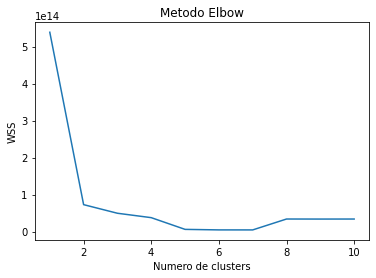

In [24]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(aux)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [25]:
#Silhouette Score
#Valor varia entre -1 e +1
#1: Clusters bem mais separados e com valores melhor definidos
#0: Distância entre os clusters formados não é significativa
#-1: Valores dos clusters errados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valores_silhouette_scores = []

for i in range(2,15):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit_predict(aux)
    score = silhouette_score(aux, km.labels_, metric='euclidean')
    
    x = []
    x.append(i)
    x.append(score)
    valores_silhouette_scores.append(x)

print(valores_silhouette_scores)


[[2, 0.9250142143601412], [3, 0.8998428641504003], [4, 0.6691510892937793], [5, 0.6698852445213958], [6, 0.6542717858843646], [7, 0.5970005616995994], [8, 0.6012896280160197], [9, 0.5622370163338332], [10, 0.5640212445079938], [11, 0.5621038482563051], [12, 0.5731037211061752], [13, 0.5545456000430045], [14, 0.559993949668295]]


In [26]:
'''
#Silhouette Score 
#Outro algotimo para calcular o valor
from sklearn.cluster import KMeans

for i in range(2,20):
    X = aux
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')

    print('Silhouetter Score: %.3f' % score)
'''

Silhouetter Score: 0.925
Silhouetter Score: 0.900
Silhouetter Score: 0.669
Silhouetter Score: 0.670
Silhouetter Score: 0.654
Silhouetter Score: 0.597
Silhouetter Score: 0.601
Silhouetter Score: 0.562
Silhouetter Score: 0.564
Silhouetter Score: 0.562
Silhouetter Score: 0.573
Silhouetter Score: 0.555
Silhouetter Score: 0.560
Silhouetter Score: 0.547
Silhouetter Score: 0.548
Silhouetter Score: 0.357
Silhouetter Score: 0.332
Silhouetter Score: 0.329


In [80]:
'''
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster = kmeans.fit_predict(aux)

#Centroides de cada um dos clusters
centroids = kmeans.cluster_centers_

print(cluster)
'''

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [81]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m
#Transformando os dados de "aux" para dimensão = 2

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)

print(pcaTransformacao)


[[-1109006.06870036   -38602.27399623]
 [13827557.20690267  3938737.64110337]
 [-1153621.67052325   -76922.13055738]
 [  238944.97630961   249988.25714691]
 [-1179022.90708067   -70018.60517186]
 [-1067861.96330907   -50152.88305508]
 [-1186710.58924654   -66082.24628264]
 [ -118163.98621637   102724.51730495]
 [  269401.53211304  -603378.80466519]
 [16055899.94972643 -3699854.01057315]
 [-1139999.02560446   -87901.77875029]
 [-1167568.25108464   -67639.2050894 ]
 [ -273392.37062963  -357516.91426906]
 [-1101501.49603287   -30324.96365522]
 [-1085867.77342914   -99209.88351522]
 [ -842212.48455266  -197028.70069507]
 [-1109948.33199493  -102299.36268313]
 [-1138863.41448912   -83021.11815465]
 [-1184768.88584851   -65574.44687468]
 [   73565.16545422    25789.99522961]
 [ -810192.12722767  -151046.03569138]
 [-1149161.99330607   -65671.96828006]
 [ -196170.43840646   684876.5648498 ]
 [  656954.18478926    81970.59550413]
 [-1176314.73812079   -68104.82337343]
 [ -570604.96015665   381

In [91]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters dos dados na dimensão = 2
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster = kmeans.fit_predict(pcaTransformacao)

#Centroides de cada um dos clusters gerados
centroids = kmeans.cluster_centers_

print(cluster)

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


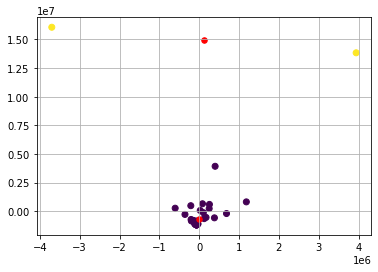

In [94]:
import matplotlib.pyplot as plt

#Plotando os dados de "aux" com base na váriavel "cluster" gerada e visualizando os centroides de cada um deles
plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
plt.scatter(centroids[:,1],centroids[:,0], s=30, c='red') #posicao do centroide do agrupamento
plt.show()


In [96]:
#Mostrar valores separados por cluster

from collections import Counter
print(Counter(cluster))


Counter({0: 46, 1: 2})


In [97]:
#Mostrar o nome das cidades por cluster

#Verificar se essa relação é correta
cidades = {
    '0':'Belo Vale',
    '1':'Betim',
    '2':'Bonfim',
    '3':'Brumadinho',
    '4':'Cachoeira da Prata',
    '5':'Caetanópolis',
    '6':'Casa Grande',
    '7':'Congonhas',
    '8':'Conselheiro Lafaiete',
    '9':'Contagem',
    '10':'Cristiano Otoni',
    '11':'Crucilândia',
    '12':'Curvelo',
    '13':'Desterro de Entre Rios',
    '14':'Entre Rios de Minas',
    '15':'Esmeraldas',
    '16':'Felixlândia',
    '17':'Florestal',
    '18':'Fortuna de Minas',
    '19':'Ibirité',
    '20':'Igarapé',
    '21':'Inhaúma',
    '22':'Itatiaiuçu',
    '23':'Itaúna',
    '24':'Itaverava',
    '25':'Jeceaba',
    '26':'Juatuba',
    '27':'Lagoa Dourada',
    '28':'Maravilhas',
    '29':'Mario Campos',
    '30':'Mateus Leme',
    '31':'Moeda',
    '32':'Ouro Branco',
    '33':'Ouro Preto',
    '34':'Papagaios',
    '35':'Pará de Minas',
    '36':'Paraopeba',
    '37':'Pequi',
    '38':'Piedade dos Gerais',
    '39':'Pompéu',
    '40':'Queluzito',
    '41':'Resende Costa',
    '42':'Rio Manso',
    '43':'São Brás do Suaçuí',
    '44':'São Joaquim de Bicas',
    '45':'São José da Varginha',
    '46':'Sarzedo',
    '47':'Sete Lagoas'
}

city = []
c0 = [] #Representa o cluster 0
c1 = [] #Representa o cluster 1
c2 = [] #Representa o cluster 2
c3 = [] #Representa o cluster 3
c4 = [] #Representa o cluster 4
c5 = [] #Representa o cluster 5
c6 = [] #Representa o cluster 6

j = 0 #Contador auxiliar para andar no vetor com os nomes das cidades

#Para cada id que representa uma cidade, eu adiciona no vetor "cidades"

for i in cidades:
    city.append(cidades[i])

#Para cada valor i do "cluster", tem-se o nome da cidade i
#Com isso, é feito um map do nome da cidade com cluster que ela pertence
for i in cluster:
    if i == 0:
        c0.append(city[j])
    elif i == 1:
        c1.append(city[j])
    elif i == 2:
        c2.append(city[j])
    elif i == 3:
        c3.append(city[j])
    elif i == 4:
        c4.append(city[j])
    elif i == 5:
        c5.append(city[j])
    elif i == 6:
        c6.append(city[j])
    
    j = j + 1
    
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)



['Belo Vale', 'Bonfim', 'Brumadinho', 'Cachoeira da Prata', 'Caetanópolis', 'Casa Grande', 'Congonhas', 'Conselheiro Lafaiete', 'Cristiano Otoni', 'Crucilândia', 'Curvelo', 'Desterro de Entre Rios', 'Entre Rios de Minas', 'Esmeraldas', 'Felixlândia', 'Florestal', 'Fortuna de Minas', 'Ibirité', 'Igarapé', 'Inhaúma', 'Itatiaiuçu', 'Itaúna', 'Itaverava', 'Jeceaba', 'Juatuba', 'Lagoa Dourada', 'Maravilhas', 'Mario Campos', 'Mateus Leme', 'Moeda', 'Ouro Branco', 'Ouro Preto', 'Papagaios', 'Pará de Minas', 'Paraopeba', 'Pequi', 'Piedade dos Gerais', 'Pompéu', 'Queluzito', 'Resende Costa', 'Rio Manso', 'São Brás do Suaçuí', 'São Joaquim de Bicas', 'São José da Varginha', 'Sarzedo', 'Sete Lagoas']
['Betim', 'Contagem']
[]
[]
[]
[]
[]


In [95]:
#Para cada um dos clusters formados, busca-se em cada um dos datasets os dados para análise
#Dataset IDH
c0_idh = []
c0_renda = []
c0_longevidade = []

c1_idh = []
c1_renda = []
c1_longevidade = []

print("Cluster C0:")
for i in c0:
    x = df_3[(df_3['Nome do Município'] == i)]
    c0_idh.append(float(x['IDH 2010']))
    c0_renda.append(float(x['IDHM Renda 2010']))
    c0_longevidade.append(float(x['IDHM Longevidade 2010']))

print("Média IDH: ", stats.mean(c0_idh))
print("Média IDH Renda: ",stats.mean(c0_renda))
print("Média IDH Longevidade: ",stats.mean(c0_longevidade))
print("\n")
print("Mediana IDH: ", stats.median(c0_idh))
print("Mediana IDH Renda: ",stats.median(c0_renda))
print("MedianaIDH Longevidade: ",stats.median(c0_longevidade))
print("\n")
print("Moda IDH: ", stats.mode(c0_idh))
print("Moda IDH Renda: ",stats.mode(c0_renda))
print("Moda IDH Longevidade: ",stats.mode(c0_longevidade))

print("\n")
print("Cluster C1:")
for i in c1:
    x = df_3[(df_3['Nome do Município'] == i)]
    c1_idh.append(float(x['IDH 2010']))
    c1_renda.append(float(x['IDHM Renda 2010']))
    c1_longevidade.append(float(x['IDHM Longevidade 2010']))

print("Média IDH: ", stats.mean(c1_idh))
print("Média IDH Renda: ",stats.mean(c1_renda))
print("Média IDH Longevidade: ",stats.mean(c1_longevidade))
print("\n")
print("Mediana IDH: ", stats.median(c1_idh))
print("Mediana IDH Renda: ",stats.median(c1_renda))
print("MedianaIDH Longevidade: ",stats.median(c1_longevidade))
print("\n")
print("Moda IDH: ", stats.mode(c1_idh))
print("Moda IDH Renda: ",stats.mode(c1_renda))
print("Moda IDH Longevidade: ",stats.mode(c1_longevidade))

Cluster C0:
Média IDH:  0.6920222222222222
Média IDH Renda:  0.6778666666666667
Média IDH Longevidade:  0.8340222222222222


Mediana IDH:  0.694
Mediana IDH Renda:  0.673
MedianaIDH Longevidade:  0.834


Moda IDH:  0.704
Moda IDH Renda:  0.689
Moda IDH Longevidade:  0.845


Cluster C1:
Média IDH:  0.708
Média IDH Renda:  0.704
Média IDH Longevidade:  0.837


Mediana IDH:  0.708
Mediana IDH Renda:  0.704
MedianaIDH Longevidade:  0.837


Moda IDH:  0.655
Moda IDH Renda:  0.672
Moda IDH Longevidade:  0.814


In [96]:
#Para cada um dos clusters formados, busca-se em cada um dos datasets os dados para análise
#Dataset CAR
import math

c0_app = []
c0_altitude_superior_1800 = []
c0_consolidada = []
c0_declividade = []
c0_imoveis = []
c0_pousio = []
c0_topo_morro = []
c0_banhado = []
c0_borda_chapada = []
c0_hidrografia = []
c0_manguezal = []
c0_nascentes = []
c0_reserva_legal = []
c0_restinga = []
c0_servidao_administrativa = []
c0_restrito = []
c0_vegetacao_nativa = []
c0_vereda = []

c1_app = []
c1_altitude_superior_1800 = []
c1_consolidada = []
c1_declividade = []
c1_imoveis = []
c1_pousio = []
c1_topo_morro = []
c1_banhado = []
c1_borda_chapada = []
c1_hidrografia = []
c1_manguezal = []
c1_nascentes = []
c1_reserva_legal = []
c1_restinga = []
c1_servidao_administrativa = []
c1_restrito = []
c1_vegetacao_nativa = []
c1_vereda = []


print("Cluster C0:")
for i in c0:
    x = df_2[(df_2['Nome do Município'] == i)]
    
    for j in x['APP']:
        c0_app.append(int(j))
    for j in x['Altitude Superior 1800']:
        c0_altitude_superior_1800.append(int(j))
    for j in x['Consolidada']:
        c0_consolidada.append(int(j))
    for j in x['Declividade Maior 45']:
        c0_declividade.append(int(j))
    for j in x['Imoveis']:
        c0_imoveis.append(int(j))
    for j in x['Pousio']:
        c0_pousio.append(int(j))
    for j in x['Topo de Morro']:
        c0_topo_morro.append(int(j))
    for j in x['Banhado']:
        c0_banhado.append(int(j))
    for j in x['Borda Chapada']:
        c0_borda_chapada.append(int(j))
    for j in x['Hidrografia']:
        c0_hidrografia.append(int(j))
    for j in x['Manguezal']:
        c0_manguezal.append(int(j))
    for j in x['Nascentes']:
        c0_nascentes.append(int(j))
    for j in x['Reserva Legal']:
        c0_reserva_legal.append(int(j))
    for j in x['Restinga']:
        c0_restinga.append(int(j))
    for j in x['Servidão Administrativa']:
        c0_servidao_administrativa.append(int(j))
    for j in x['Restrito']:
        c0_restrito.append(int(j))
    for j in x['Vegetação Nativa']:
        c0_vegetacao_nativa.append(int(j))
    for j in x['Vereda']:
        c0_vereda.append(int(j))
        
print("Média APP: ", math.ceil(stats.mean(c0_app)))
print("Média Altitude Superior 1800: ", math.ceil(stats.mean(c0_altitude_superior_1800)))
print("Média Consolidada: ", math.ceil(stats.mean(c0_consolidada)))
print("Média Declividade: ", math.ceil(stats.mean(c0_declividade)))
print("Média Imoveis: ", math.ceil(stats.mean(c0_imoveis)))
print("Média Pousio: ", math.ceil(stats.mean(c0_pousio)))
print("Média Topo Morro: ", math.ceil(stats.mean(c0_topo_morro)))
print("Média Banhado: ", math.ceil(stats.mean(c0_banhado)))
print("Média Borda Chapada: ", math.ceil(stats.mean(c0_borda_chapada)))
print("Média Hidrografia: ", math.ceil(stats.mean(c0_hidrografia)))
print("Média Nascentes: ", math.ceil(stats.mean(c0_nascentes)))
print("Média Reserva Legal: ", math.ceil(stats.mean(c0_reserva_legal)))
print("Média Restinga: ", math.ceil(stats.mean(c0_restinga)))
print("Média Servidão Administrativa: ", math.ceil(stats.mean(c0_servidao_administrativa
)))
print("Média Restrito: ", math.ceil(stats.mean(c0_restrito)))
print("Média Vegetação Nativa: ", math.ceil(stats.mean(c0_vegetacao_nativa)))
print("Média Vereda: ", math.ceil(stats.mean(c0_vereda)))
print("\n")

print("Mediana APP: ", math.ceil(stats.median(c0_app)))
print("Mediana Altitude Superior 1800: ", math.ceil(stats.median(c0_altitude_superior_1800)))
print("Mediana Consolidada: ", math.ceil(stats.median(c0_consolidada)))
print("Mediana Declividade: ", math.ceil(stats.median(c0_declividade)))
print("Mediana Imoveis: ", math.ceil(stats.median(c0_imoveis)))
print("Mediana Pousio: ", math.ceil(stats.median(c0_pousio)))
print("Mediana Topo Morro: ", math.ceil(stats.median(c0_topo_morro)))
print("Mediana Banhado: ", math.ceil(stats.median(c0_banhado)))
print("Mediana Borda Chapada: ", math.ceil(stats.median(c0_borda_chapada)))
print("Mediana Hidrografia: ", math.ceil(stats.median(c0_hidrografia)))
print("Mediana Nascentes: ", math.ceil(stats.median(c0_nascentes)))
print("Mediana Reserva Legal: ", math.ceil(stats.median(c0_reserva_legal)))
print("Mediana Restinga: ", math.ceil(stats.median(c0_restinga)))
print("Mediana Servidão Administrativa: ", math.ceil(stats.median(c0_servidao_administrativa
)))
print("Mediana Restrito: ", math.ceil(stats.median(c0_restrito)))
print("Mediana Vegetação Nativa: ", math.ceil(stats.median(c0_vegetacao_nativa)))
print("Mediana Vereda: ", math.ceil(stats.median(c0_vereda)))
print("\n")

print("Moda APP: ", math.ceil(stats.mode(c0_app)))
print("Moda Altitude Superior 1800: ", math.ceil(stats.mode(c0_altitude_superior_1800)))
print("Moda Consolidada: ", math.ceil(stats.mode(c0_consolidada)))
print("Moda Declividade: ", math.ceil(stats.mode(c0_declividade)))
print("Moda Imoveis: ", math.ceil(stats.mode(c0_imoveis)))
print("Moda Pousio: ", math.ceil(stats.mode(c0_pousio)))
print("Moda Topo Morro: ", math.ceil(stats.mode(c0_topo_morro)))
print("Moda Banhado: ", math.ceil(stats.mode(c0_banhado)))
print("Moda Borda Chapada: ", math.ceil(stats.mode(c0_borda_chapada)))
print("Moda Hidrografia: ", math.ceil(stats.mode(c0_hidrografia)))
print("Moda Nascentes: ", math.ceil(stats.mode(c0_nascentes)))
print("Moda Reserva Legal: ", math.ceil(stats.mode(c0_reserva_legal)))
print("Moda Restinga: ", math.ceil(stats.mode(c0_restinga)))
print("Moda Servidão Administrativa: ", math.ceil(stats.mode(c0_servidao_administrativa
)))
print("Moda Restrito: ", math.ceil(stats.mode(c0_restrito)))
print("Moda Vegetação Nativa: ", math.ceil(stats.mode(c0_vegetacao_nativa)))
print("Moda Vereda: ", math.ceil(stats.mode(c0_vereda)))

print("\n")
print("Cluster C1:")

for i in c1:
    x = df_2[(df_2['Nome do Município'] == i)]
    
    for j in x['APP']:
        c1_app.append(int(j))
    for j in x['Altitude Superior 1800']:
        c1_altitude_superior_1800.append(int(j))
    for j in x['Consolidada']:
        c1_consolidada.append(int(j))
    for j in x['Declividade Maior 45']:
        c1_declividade.append(int(j))
    for j in x['Imoveis']:
        c1_imoveis.append(int(j))
    for j in x['Pousio']:
        c1_pousio.append(int(j))
    for j in x['Topo de Morro']:
        c1_topo_morro.append(int(j))
    for j in x['Banhado']:
        c1_banhado.append(int(j))
    for j in x['Borda Chapada']:
        c1_borda_chapada.append(int(j))
    for j in x['Hidrografia']:
        c1_hidrografia.append(int(j))
    for j in x['Manguezal']:
        c1_manguezal.append(int(j))
    for j in x['Nascentes']:
        c1_nascentes.append(int(j))
    for j in x['Reserva Legal']:
        c1_reserva_legal.append(int(j))
    for j in x['Restinga']:
        c1_restinga.append(int(j))
    for j in x['Servidão Administrativa']:
        c1_servidao_administrativa.append(int(j))
    for j in x['Restrito']:
        c1_restrito.append(int(j))
    for j in x['Vegetação Nativa']:
        c1_vegetacao_nativa.append(int(j))
    for j in x['Vereda']:
        c1_vereda.append(int(j))

print("Média APP: ", math.ceil(stats.mean(c1_app)))
print("Média Altitude Superior 1800: ", math.ceil(stats.mean(c1_altitude_superior_1800)))
print("Média Consolidada: ", math.ceil(stats.mean(c1_consolidada)))
print("Média Declividade: ", math.ceil(stats.mean(c1_declividade)))
print("Média Imoveis: ", math.ceil(stats.mean(c1_imoveis)))
print("Média Pousio: ", math.ceil(stats.mean(c1_pousio)))
print("Média Topo Morro: ", math.ceil(stats.mean(c1_topo_morro)))
print("Média Banhado: ", math.ceil(stats.mean(c1_banhado)))
print("Média Borda Chapada: ", math.ceil(stats.mean(c1_borda_chapada)))
print("Média Hidrografia: ", math.ceil(stats.mean(c1_hidrografia)))
print("Média Nascentes: ", math.ceil(stats.mean(c1_nascentes)))
print("Média Reserva Legal: ", math.ceil(stats.mean(c1_reserva_legal)))
print("Média Restinga: ", math.ceil(stats.mean(c1_restinga)))
print("Média Servidão Administrativa: ", math.ceil(stats.mean(c1_servidao_administrativa
)))
print("Média Restrito: ", math.ceil(stats.mean(c1_restrito)))
print("Média Vegetação Nativa: ", math.ceil(stats.mean(c1_vegetacao_nativa)))
print("Média Vereda: ", math.ceil(stats.mean(c1_vereda)))
print("\n")

print("Mediana APP: ", math.ceil(stats.median(c1_app)))
print("Mediana Altitude Superior 1800: ", math.ceil(stats.median(c1_altitude_superior_1800)))
print("Mediana Consolidada: ", math.ceil(stats.median(c1_consolidada)))
print("Mediana Declividade: ", math.ceil(stats.median(c1_declividade)))
print("Mediana Imoveis: ", math.ceil(stats.median(c1_imoveis)))
print("Mediana Pousio: ", math.ceil(stats.median(c1_pousio)))
print("Mediana Topo Morro: ", math.ceil(stats.median(c1_topo_morro)))
print("Mediana Banhado: ", math.ceil(stats.median(c1_banhado)))
print("Mediana Borda Chapada: ", math.ceil(stats.median(c1_borda_chapada)))
print("Mediana Hidrografia: ", math.ceil(stats.median(c1_hidrografia)))
print("Mediana Nascentes: ", math.ceil(stats.median(c1_nascentes)))
print("Mediana Reserva Legal: ", math.ceil(stats.median(c1_reserva_legal)))
print("Mediana Restinga: ", math.ceil(stats.median(c1_restinga)))
print("Mediana Servidão Administrativa: ", math.ceil(stats.median(c1_servidao_administrativa
)))
print("Mediana Restrito: ", math.ceil(stats.median(c1_restrito)))
print("Mediana Vegetação Nativa: ", math.ceil(stats.median(c1_vegetacao_nativa)))
print("Mediana Vereda: ", math.ceil(stats.median(c1_vereda)))
print("\n")

print("Moda APP: ", math.ceil(stats.mode(c1_app)))
print("Moda Altitude Superior 1800: ", math.ceil(stats.mode(c1_altitude_superior_1800)))
print("Moda Consolidada: ", math.ceil(stats.mode(c1_consolidada)))
print("Moda Declividade: ", math.ceil(stats.mode(c1_declividade)))
print("Moda Imoveis: ", math.ceil(stats.mode(c1_imoveis)))
print("Moda Pousio: ", math.ceil(stats.mode(c1_pousio)))
print("Moda Topo Morro: ", math.ceil(stats.mode(c1_topo_morro)))
print("Moda Banhado: ", math.ceil(stats.mode(c1_banhado)))
print("Moda Borda Chapada: ", math.ceil(stats.mode(c1_borda_chapada)))
print("Moda Hidrografia: ", math.ceil(stats.mode(c1_hidrografia)))
print("Moda Nascentes: ", math.ceil(stats.mode(c1_nascentes)))
print("Moda Reserva Legal: ", math.ceil(stats.mode(c1_reserva_legal)))
print("Moda Restinga: ", math.ceil(stats.mode(c1_restinga)))
print("Moda Servidão Administrativa: ", math.ceil(stats.mode(c1_servidao_administrativa
)))
print("Moda Restrito: ", math.ceil(stats.mode(c1_restrito)))
print("Moda Vegetação Nativa: ", math.ceil(stats.mode(c1_vegetacao_nativa)))
print("Moda Vereda: ", math.ceil(stats.mode(c1_vereda)))


Cluster C0:
Média APP:  4171
Média Altitude Superior 1800:  1
Média Consolidada:  765
Média Declividade:  4
Média Imoveis:  885
Média Pousio:  28
Média Topo Morro:  3
Média Banhado:  5
Média Borda Chapada:  1
Média Hidrografia:  736
Média Nascentes:  315
Média Reserva Legal:  875
Média Restinga:  2
Média Servidão Administrativa:  154
Média Restrito:  32
Média Vegetação Nativa:  861
Média Vereda:  850


Mediana APP:  3659
Mediana Altitude Superior 1800:  0
Mediana Consolidada:  612
Mediana Declividade:  2
Mediana Imoveis:  741
Mediana Pousio:  18
Mediana Topo Morro:  1
Mediana Banhado:  1
Mediana Borda Chapada:  0
Mediana Hidrografia:  630
Mediana Nascentes:  247
Mediana Reserva Legal:  710
Mediana Restinga:  0
Mediana Servidão Administrativa:  95
Mediana Restrito:  7
Mediana Vegetação Nativa:  692
Mediana Vereda:  3


Moda APP:  2664
Moda Altitude Superior 1800:  0
Moda Consolidada:  446
Moda Declividade:  0
Moda Imoveis:  741
Moda Pousio:  11
Moda Topo Morro:  1
Moda Banhado:  0
Moda 

In [52]:
#Dataset IBGE

c0_populacao_estimada = []
c0_populacao_censo = []
c0_densidade_demografica = []
c0_salario_medio_mensal = []
c0_pessoal_ocupado = []
c0_populacao_ocupada = []
c0_populacao_renda_meio_salario = []
c0_taxa_escolarizacao_6_14 = []
c0_ideb_anos_finais_ensino_medio = []
c0_ideb_anos_finais_ensino_fundamental = []
c0_matriculas_ensino_fundamental = []
c0_matriculas_ensino_medio = []
c0_docentes_ensino_fundamental = []
c0_docentes_ensino_medio = []
c0_numero_estabelecimentos_ensino_fundamental = []
c0_numero_estabelecimentos_ensino_medio = []
c0_pib_per_capita = []
c0_percentual_receita_fontes_externas = []
c0_idhm = []
c0_receitas_realizadas = []
c0_receitas_empenhadas = []
c0_mortalidade_infantil = []
c0_internacoes_diarreia = []
c0_unidades_sus = []
c0_area_territorial = []
c0_esgotamento = []
c0_arborizacao = []
c0_urbanizacao = []

c1_populacao_estimada = []
c1_populacao_censo = []
c1_densidade_demografica = []
c1_salario_medio_mensal = []
c1_pessoal_ocupado = []
c1_populacao_ocupada = []
c1_populacao_renda_meio_salario = []
c1_taxa_escolarizacao_6_14 = []
c1_ideb_anos_finais_ensino_medio = []
c1_ideb_anos_finais_ensino_fundamental = []
c1_matriculas_ensino_fundamental = []
c1_matriculas_ensino_medio = []
c1_docentes_ensino_fundamental = []
c1_docentes_ensino_medio = []
c1_numero_estabelecimentos_ensino_fundamental = []
c1_numero_estabelecimentos_ensino_medio = []
c1_pib_per_capita = []
c1_percentual_receita_fontes_externas = []
c1_idhm = []
c1_receitas_realizadas = []
c1_receitas_empenhadas = []
c1_mortalidade_infantil = []
c1_internacoes_diarreia = []
c1_unidades_sus = []
c1_area_territorial = []
c1_esgotamento = []
c1_arborizacao = []
c1_urbanizacao = []

for i in c0:
    df = df_4[(df_4['Nome do Município'] == i)]
    c0_populacao_estimada.append(float(df['População estimada(2021)']))
    c0_populacao_censo.append(float(df['População censo(2010)']))
    c0_densidade_demografica.append(float(df['Densidade demografica(2010)']))
    c0_salario_medio_mensal.append(float(df['Salario medio mensal(2019)']))
    c0_pessoal_ocupado.append(float(df['Pessoal ocupado(2019)']))
    c0_populacao_ocupada.append(float(df['Populacao ocupada(2019)']))
    c0_populacao_renda_meio_salario.append(float(df['Percentual da populacao com renda de ate meio salario(2010)']))
    c0_taxa_escolarizacao_6_14.append(float(df['Taxa escolarizacao 6 a 14 anos(2010)']))
    #c0_ideb_anos_finais_ensino_medio.append(float(df['IDEB anos finais ensino medio(2019)']))
    #c0_ideb_anos_finais_ensino_fundamental.append(float(df['IDEB anos finais ensino fundamental(2019)']))
    c0_matriculas_ensino_fundamental.append(float(df['Matriculas ensino fundamental(2020)']))
    c0_matriculas_ensino_medio.append(float(df['Matriculas ensino medio(2020)']))
    c0_docentes_ensino_fundamental.append(float(df['Docentes ensino fundamental(2020)']))
    c0_docentes_ensino_medio.append(float(df['Docentes ensino medio(2020)']))
    c0_numero_estabelecimentos_ensino_fundamental.append(float(df['Numeros estabelecimentos ensino fundamental(2010)']))
    c0_numero_estabelecimentos_ensino_medio.append(float(df['Numeros estabelecimentos ensino medio(2020)']))
    c0_pib_per_capita.append(float(df['PIB per capita(2019)']))
    #c0_percentual_receita_fontes_externas.append(float(df['Percentual receitas fontes externas(2015)']))
    c0_idhm.append(float(df['IDHM(2010)']))
    c0_receitas_realizadas.append(float(df['Total receitas realizadas(2017)']))
    c0_receitas_empenhadas.append(float(df['Total receitas empenhadas(2017)']))
    #c0_mortalidade_infantil.append(float(df['Mortalidade infantil(2019)']))
    #c0_internacoes_diarreia.append(float(df['Internacoes por diarreia(2016)']))
    c0_unidades_sus.append(float(df['Estabelecimentos SUS(2009)']))
    c0_area_territorial.append(float(df['Area territorial(2021)']))
    c0_esgotamento.append(float(df['Esgotamento adequado(2010)']))
    c0_arborizacao.append(float(df['Arborização vias publicas(2010)']))
    c0_urbanizacao.append(float(df['Urbanizacao vias publicas(2010)']))

print("Cluster C0")
print("\n")
print("Media População estimada(2021): ",stats.mean(c0_populacao_estimada))
print("Media População censo(2010): ",stats.mean(c0_populacao_censo))
print("Media Densidade demografica(2010): ",stats.mean(c0_densidade_demografica))
print("Media Salario medio mensal(2019): ",stats.mean(c0_salario_medio_mensal))
print("Media Pessoal ocupado(2019): ",stats.mean(c0_pessoal_ocupado))
print("Media Populacao ocupada(2019): ",stats.mean(c0_populacao_ocupada))
print("Media Percentual da populacao com renda de ate meio salario(2010): ",stats.mean(c0_populacao_renda_meio_salario))
print("Media Taxa escolarizacao 6 a 14 anos(2010): ",stats.mean(c0_taxa_escolarizacao_6_14))
#print("Media IDEB anos finais ensino medio(2019): ",stats.mean(c0_ideb_anos_finais_ensino_medio))
#print("Media IDEB anos finais ensino fundamental(2019): ",stats.mean(c0_ideb_anos_finais_ensino_fundamental))
print("Media Matriculas ensino fundamental(2020): ",stats.mean(c0_matriculas_ensino_fundamental))
print("Media Matriculas ensino medio(2020): ",stats.mean(c0_matriculas_ensino_medio))
print("Media Docentes ensino fundamental(2020): ",stats.mean(c0_docentes_ensino_fundamental))
print("Media Docentes ensino medio(2020): ",stats.mean(c0_docentes_ensino_medio))
print("Media Numeros estabelecimentos ensino fundamental(2010): ",stats.mean(c0_numero_estabelecimentos_ensino_fundamental))
print("Media Numeros estabelecimentos ensino medio(2020): ",stats.mean(c0_numero_estabelecimentos_ensino_medio))
print("Media PIB per capita(2019): ",stats.mean(c0_pib_per_capita))
#print("Media Percentual receitas fontes externas(2015): ",stats.mean(c0_percentual_receita_fontes_externas))
print("Media IDHM(2010): ",stats.mean(c0_idhm))
print("Media Total receitas realizadas(2017): ",stats.mean(c0_receitas_realizadas))
print("Media Total receitas empenhadas(2017): ",stats.mean(c0_receitas_empenhadas))
#print("Media Mortalidade infantil(2019): ",stats.mean(c0_mortalidade_infantil))
#print("Media Internacoes por diarreia(2016): ",stats.mean(c0_internacoes_diarreia))
print("Media Estabelecimentos SUS(2009): ",stats.mean(c0_unidades_sus))
print("Media Area territorial(2021): ",stats.mean(c0_area_territorial))
print("Media Esgotamento adequado(2010): ",stats.mean(c0_esgotamento))
print("Media Arborização vias publicas(2010): ",stats.mean(c0_arborizacao))
print("Media Urbanizacao vias publicas(2010): ",stats.mean(c0_urbanizacao))
    
for i in c1:
    df = df_4[(df_4['Nome do Município'] == i)]
    c1_populacao_estimada.append(float(df['População estimada(2021)']))
    c1_populacao_censo.append(float(df['População censo(2010)']))
    c1_densidade_demografica.append(float(df['Densidade demografica(2010)']))
    c1_salario_medio_mensal.append(float(df['Salario medio mensal(2019)']))
    c1_pessoal_ocupado.append(float(df['Pessoal ocupado(2019)']))
    c1_populacao_ocupada.append(float(df['Populacao ocupada(2019)']))
    c1_populacao_renda_meio_salario.append(float(df['Percentual da populacao com renda de ate meio salario(2010)']))
    c1_taxa_escolarizacao_6_14.append(float(df['Taxa escolarizacao 6 a 14 anos(2010)']))
    #c1_ideb_anos_finais_ensino_medio.append(float(df['IDEB anos finais ensino medio(2019)']))
    #c1_ideb_anos_finais_ensino_fundamental.append(float(df['IDEB anos finais ensino fundamental(2019)']))
    c1_matriculas_ensino_fundamental.append(float(df['Matriculas ensino fundamental(2020)']))
    c1_matriculas_ensino_medio.append(float(df['Matriculas ensino medio(2020)']))
    c1_docentes_ensino_fundamental.append(float(df['Docentes ensino fundamental(2020)']))
    c1_docentes_ensino_medio.append(float(df['Docentes ensino medio(2020)']))
    c1_numero_estabelecimentos_ensino_fundamental.append(float(df['Numeros estabelecimentos ensino fundamental(2010)']))
    c1_numero_estabelecimentos_ensino_medio.append(float(df['Numeros estabelecimentos ensino medio(2020)']))
    c1_pib_per_capita.append(float(df['PIB per capita(2019)']))
    #c1_percentual_receita_fontes_externas.append(float(df['Percentual receitas fontes externas(2015)']))
    c1_idhm.append(float(df['IDHM(2010)']))
    c1_receitas_realizadas.append(float(df['Total receitas realizadas(2017)']))
    c1_receitas_empenhadas.append(float(df['Total receitas empenhadas(2017)']))
    #c1_mortalidade_infantil.append(float(df['Mortalidade infantil(2019)']))
    #c1_internacoes_diarreia.append(float(df['Internacoes por diarreia(2016)']))
    c1_unidades_sus.append(float(df['Estabelecimentos SUS(2009)']))
    c1_area_territorial.append(float(df['Area territorial(2021)']))
    c1_esgotamento.append(float(df['Esgotamento adequado(2010)']))
    c1_arborizacao.append(float(df['Arborização vias publicas(2010)']))
    c1_urbanizacao.append(float(df['Urbanizacao vias publicas(2010)']))
    
print("\n")
print("Cluster C1")
print("\n")
print("Media População estimada(2021): ",stats.mean(c1_populacao_estimada))
print("Media População censo(2010): ",stats.mean(c1_populacao_censo))
print("Media Densidade demografica(2010): ",stats.mean(c1_densidade_demografica))
print("Media Salario medio mensal(2019): ",stats.mean(c1_salario_medio_mensal))
print("Media Pessoal ocupado(2019): ",stats.mean(c1_pessoal_ocupado))
print("Media Populacao ocupada(2019): ",stats.mean(c1_populacao_ocupada))
print("Media Percentual da populacao com renda de ate meio salario(2010): ",stats.mean(c1_populacao_renda_meio_salario))
print("Media Taxa escolarizacao 6 a 14 anos(2010): ",stats.mean(c1_taxa_escolarizacao_6_14))
#print("Media IDEB anos finais ensino medio(2019): ",stats.mean(c1_ideb_anos_finais_ensino_medio))
#print("Media IDEB anos finais ensino fundamental(2019): ",stats.mean(c1_ideb_anos_finais_ensino_fundamental))
print("Media Matriculas ensino fundamental(2020): ",stats.mean(c1_matriculas_ensino_fundamental))
print("Media Matriculas ensino medio(2020): ",stats.mean(c1_matriculas_ensino_medio))
print("Media Docentes ensino fundamental(2020): ",stats.mean(c1_docentes_ensino_fundamental))
print("Media Docentes ensino medio(2020): ",stats.mean(c1_docentes_ensino_medio))
print("Media Numeros estabelecimentos ensino fundamental(2010): ",stats.mean(c1_numero_estabelecimentos_ensino_fundamental))
print("Media Numeros estabelecimentos ensino medio(2020): ",stats.mean(c1_numero_estabelecimentos_ensino_medio))
print("Media PIB per capita(2019): ",stats.mean(c1_pib_per_capita))
#print("Media Percentual receitas fontes externas(2015): ",stats.mean(c1_percentual_receita_fontes_externas))
print("Media IDHM(2010): ",stats.mean(c1_idhm))
print("Media Total receitas realizadas(2017): ",stats.mean(c1_receitas_realizadas))
print("Media Total receitas empenhadas(2017): ",stats.mean(c1_receitas_empenhadas))
#print("Media Mortalidade infantil(2019): ",stats.mean(c1_mortalidade_infantil))
#print("Media Internacoes por diarreia(2016): ",stats.mean(c1_internacoes_diarreia))
print("Media Estabelecimentos SUS(2009): ",stats.mean(c1_unidades_sus))
print("Media Area territorial(2021): ",stats.mean(c1_area_territorial))
print("Media Esgotamento adequado(2010): ",stats.mean(c1_esgotamento))
print("Media Arborização vias publicas(2010): ",stats.mean(c1_arborizacao))
print("Media Urbanizacao vias publicas(2010): ",stats.mean(c1_urbanizacao))

#Adicionar moda e mediana para cada um dos clusters


Cluster C0


Media População estimada(2021):  50296.35555555556
Media População censo(2010):  44005.666666666664
Media Densidade demografica(2010):  213.28066666666666
Media Salario medio mensal(2019):  2.013333333333333
Media Pessoal ocupado(2019):  12773.511111111111
Media Populacao ocupada(2019):  20.373333333333335
Media Percentual da populacao com renda de ate meio salario(2010):  35.617777777777775
Media Taxa escolarizacao 6 a 14 anos(2010):  97.82444444444444
Media Matriculas ensino fundamental(2020):  5843.288888888889
Media Matriculas ensino medio(2020):  1726.111111111111
Media Docentes ensino fundamental(2020):  326.77777777777777
Media Docentes ensino medio(2020):  126.02222222222223
Media Numeros estabelecimentos ensino fundamental(2010):  18.866666666666667
Media Numeros estabelecimentos ensino medio(2020):  5.933333333333334
Media PIB per capita(2019):  31324.100666666665
Media IDHM(2010):  0.6893777777777778
Media Total receitas realizadas(2017):  149092.85533333334
Med

In [110]:
#Dataset PIB dos municípios
import math

c0_agropecuaria = []
c0_industria = []
c0_servicos = []
c0_servicos_1 = []

c1_agropecuaria = []
c1_industria = []
c1_servicos = []
c1_servicos_1 = []

for i in c0:
    x = df_1[(df_1['Nome do Município'] == i)]
    
    for j in x['PIB Agropecuária x1000']:
        c0_agropecuaria.append(float(j))
    for j in x['PIB Industria x1000']:
        c0_industria.append(float(j))
    for j in x['PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000']:
        c0_servicos.append(float(j))
    for j in x['PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000']:     
        c0_servicos_1.append(float(j))


print("Cluster C0")
print("\n")
print("Media PIB Agropecuaria: ", stats.mean(c0_agropecuaria))
print("Media PIB Industria: ", stats.mean(c0_industria))
print("Media PIB Serviços: ", stats.mean(c0_servicos))
print("Media PIB Serviços 02: ", stats.mean(c0_servicos_1))
print("\n")
print("Mediana PIB Agropecuaria: ", math.ceil(stats.median(c0_agropecuaria)))
print("Mediana PIB Industria: ", math.ceil(stats.median(c0_industria)))
print("Mediana PIB Serviços: ", math.ceil(stats.median(c0_servicos)))
print("Mediana PIB Serviços 02: ", math.ceil(stats.median(c0_servicos_1)))
print("\n")
print("Moda PIB Agropecuaria: ", math.ceil(stats.mode(c0_agropecuaria)))
print("Moda PIB Industria: ", math.ceil(stats.mode(c0_industria)))
print("Moda PIB Serviços: ", math.ceil(stats.mode(c0_servicos)))
print("Moda PIB Serviços 02: ", math.ceil(stats.mode(c0_servicos_1)))

for i in c1:
    x = df_1[(df_1['Nome do Município'] == i)]
    
    for j in x['PIB Agropecuária x1000']:
        c1_agropecuaria.append(float(j))
    for j in x['PIB Industria x1000']:
        c1_industria.append(float(j))
    for j in x['PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000']:
        c1_servicos.append(float(j))
    for j in x['PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000']:     
        c1_servicos_1.append(float(j))

print("\n")
print("Cluster C1")
print("\n")
print("Media PIB Agropecuaria: ", stats.mean(c1_agropecuaria))
print("Media PIB Industria: ", stats.mean(c1_industria))
print("Media PIB Serviços: ", stats.mean(c1_servicos))
print("Media PIB Serviços 02: ", stats.mean(c1_servicos_1))
print("\n")
print("Mediana PIB Agropecuaria: ", math.ceil(stats.median(c1_agropecuaria)))
print("Mediana PIB Industria: ", math.ceil(stats.median(c1_industria)))
print("Mediana PIB Serviços: ", math.ceil(stats.median(c1_servicos)))
print("Mediana PIB Serviços 02: ", math.ceil(stats.median(c1_servicos_1)))
print("\n")
print("Moda PIB Agropecuaria: ", math.ceil(stats.mode(c1_agropecuaria)))
print("Moda PIB Industria: ", math.ceil(stats.mode(c1_industria)))
print("Moda PIB Serviços: ", math.ceil(stats.mode(c1_servicos)))
print("Moda PIB Serviços 02: ", math.ceil(stats.mode(c1_servicos_1)))


Cluster C0


Media PIB Agropecuaria:  14653.975
Media PIB Industria:  196722.255
Media PIB Serviços:  739122.17
Media PIB Serviços 02:  295553.75999999995


Mediana PIB Agropecuaria:  14654
Mediana PIB Industria:  196723
Mediana PIB Serviços:  739123
Mediana PIB Serviços 02:  295554


Moda PIB Agropecuaria:  17363
Moda PIB Industria:  63197
Moda PIB Serviços:  51779
Moda PIB Serviços 02:  49607


Cluster C1


Media PIB Agropecuaria:  26124.023846153847
Media PIB Industria:  755662.6625641026
Media PIB Serviços:  980195.1248717948
Media PIB Serviços 02:  258577.95307692306


Mediana PIB Agropecuaria:  13784
Mediana PIB Industria:  62325
Mediana PIB Serviços:  105886
Mediana PIB Serviços 02:  63770


Moda PIB Agropecuaria:  12977
Moda PIB Industria:  11537468
Moda PIB Serviços:  9924629
Moda PIB Serviços 02:  2212077
